In [379]:
import numpy as np 
import pandas as pd

from K_means import Kmeans
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist

import string

from nltk.corpus import stopwords

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import neattext.functions as nfx

from textblob import TextBlob as tb
from textblob import Word

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

In [380]:
april=pd.read_csv('02_PREPROCESSED_APRIL.csv')

In [381]:
custom_words = ['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',
                'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', '%', '.', 'the', 'etc', 'pls', 'btw', 'let', 'hgd', 'get', 'amp', 'gt','lt','hrs','dos','say','reply','sir']

In [382]:
for i in range(0,april.shape[0]):
    april['clean_tweet'][i]= ''.join([i for i in april['clean_tweet'][i] if not i.isdigit()])
    april['clean_tweet'][i]=april['clean_tweet'][i].lower()
    april['clean_tweet'][i]=nfx.remove_custom_words(april['clean_tweet'][i],custom_words)

In [383]:
tweets_april=april['clean_tweet']

In [384]:
tweet_list_april = tweets_april.apply(nfx.remove_stopwords)
tweet_list_april = tweet_list_april .apply(nfx.remove_special_characters)
tweet_list_april = tweet_list_april.apply(nfx.remove_punctuations)

In [385]:
def remove_single_char(list):
    for token in list:
        if( len(token)==1):
            list.remove(token)
def remove_dual_char(list):
    for token in list:
        if( len(token)==2):
            list.remove(token)
def remove_words(list1, remove_words):
    for word in list(list1):
        if word in remove_words:
            list1.remove(word)
    return list1   

In [386]:
def Convert_list(string):
    li = list(string.split(" "))
    return li
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

In [387]:
for i in range(0,april.shape[0]):
    ls=Convert_list(tweet_list_april[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_april[i]=listToString(ls)

In [388]:
def my_lemma(token,i=0):
    word=tb(token)
    tags=word.tags
    sample=Word(tags[0][0])
    if tags[0][1][0] =='V':
        x=sample.lemmatize('v')
        ls[i]=x
    else:
        x=sample.lemmatize()
        ls[i]=x

In [389]:
for i in range(0,april.shape[0]):
    ls=Convert_list(tweet_list_april[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
                continue
        word=tb(text)
        tags=word.tags
        sample=Word(tags[0][0])
        if tags[0][1][0] =='V':
                x=sample.lemmatize('v')
                ls[j]=x
        else:
                x=sample.lemmatize()
                ls[j]=x

In [390]:
for i in range(0,april.shape[0]):
    ls=Convert_list(tweet_list_april[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
            continue
        my_lemma(text,j)
    tweet_list_april[i]=listToString(ls)

In [391]:
for i in range(0,april.shape[0]):
    ls=Convert_list(tweet_list_april[i])
    ls=remove_words(ls,custom_words)
    tweet_list_april[i]=listToString(ls)

In [392]:
april['clean_tweet']=tweet_list_april

In [393]:
april['clean_tweet']

0       covid infection lead clousure jamshedpur schoo...
1       uk glastonbury festival cinema museum governme...
2       covid lockdown desperate watch leak cum like t...
3       thanks orla pandemic tougher si canada hubster...
4       strict action dp ampc premier campus faisalaba...
                              ...                        
2560    incarcerate population heighten risk develop s...
2561                            bad time shopping despite
2562    request warrior movement help needy people pan...
2563    covid pandemic corona patient city like jaipur...
2564    covid news corona infection increase kumbh mel...
Name: clean_tweet, Length: 2565, dtype: object

In [394]:
tweet_list_april=april['clean_tweet']
ps=PorterStemmer()
for i in range(0,april.shape[0]):
    ls=april['clean_tweet'][i]
    words = word_tokenize(ls)
    st=""
    for w in words:
        w=ps.stem(w)
        st+=w+' '
    april['clean_tweet'][i]=st
for i in range(0,april.shape[0]):
    ls=Convert_list(tweet_list_april[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_april[i]=listToString(ls)
april['clean_tweet']=tweet_list_april

# K-Means

In [395]:
data =april['clean_tweet']

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [396]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())

,aachi,aadharcard,aadmi,aag,aaj,aameen,aap,aapki,aapn,aarahi,...,zimaa,zinda,zindabad,zonal,zone,zoneyangon,zoom,zoster,zuckerberg,zydu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


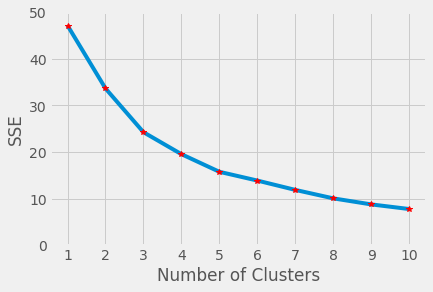

In [397]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans_kwargs = {"init": "k-means++","n_init": 2,"max_iter": 1000,"random_state": 42,}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Y_sklearn)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.plot(range(1, 11), sse,'r*')
plt.xticks(range(1, 11))
plt.yticks(range(0,60,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.44015121662831413
For n_clusters = 3 The average silhouette_score is : 0.47669285247560417
For n_clusters = 4 The average silhouette_score is : 0.38995805240582765
For n_clusters = 5 The average silhouette_score is : 0.42033334761216495
For n_clusters = 6 The average silhouette_score is : 0.4075858748700603
For n_clusters = 7 The average silhouette_score is : 0.4024594377000644
For n_clusters = 8 The average silhouette_score is : 0.40475367302229887
For n_clusters = 9 The average silhouette_score is : 0.346070868621494
For n_clusters = 10 The average silhouette_score is : 0.3622091312774381


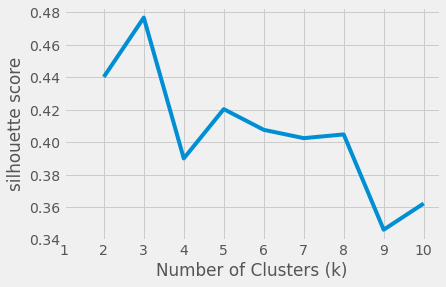

In [398]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.style as style
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
    cluster_labels = clusterer.fit_predict(Y_sklearn)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y_sklearn, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y_sklearn, cluster_labels)
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.xticks(range(1, 11))
plt.show()

Text(0.5, 1.0, 'April')

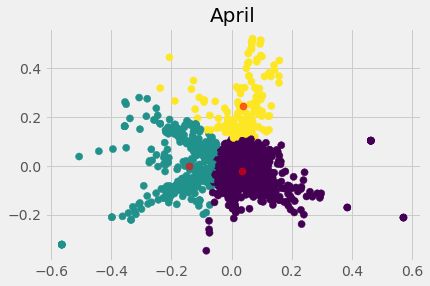

In [422]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=1000,n_init=2, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

centers = fitted.cluster_centers_
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=50, alpha=0.6);
plt.title('April',fontsize=20)
# plt.xlabel("Feature space for the 1st feature")
# plt.ylabel("Feature space for the 2nd feature")

In [400]:
labels = np.unique(prediction)
dfs1 = []
for label in labels:
    id_temp = np.where(prediction==label) 
    x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
    sorted_means = np.argsort(x_means)[::-1]
    features = tf_idf_vectorizor.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means]
    df = pd.DataFrame(best_features, columns = ['features', 'score'])
    dfs1.append(df)

In [401]:
dfs1[0]

,features,score
0,case,0.222580
1,covid,0.119155
2,death,0.084439
3,new,0.083046
4,day,0.076522
...,...,...
5920,percepect,0.000000
5921,perfect,0.000000
5922,perfection,0.000000
5923,perform,0.000000


In [402]:
dfs1[1]

,features,score
0,covid,0.057177
1,vaccin,0.041706
2,peopl,0.019429
3,help,0.018791
4,hospit,0.017859
...,...,...
5920,democrat,0.000000
5921,dene,0.000000
5922,khalitani,0.000000
5923,dental,0.000000


In [403]:
dfs1[2]

,features,score
0,corona,0.123484
1,curfew,0.080931
2,night,0.068465
3,viru,0.041892
4,day,0.023813
...,...,...
5920,nois,0.000000
5921,nom,0.000000
5922,nonbail,0.000000
5923,nonmuslimveri,0.000000


In [404]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 10)

In [405]:
april_cluster=dfs

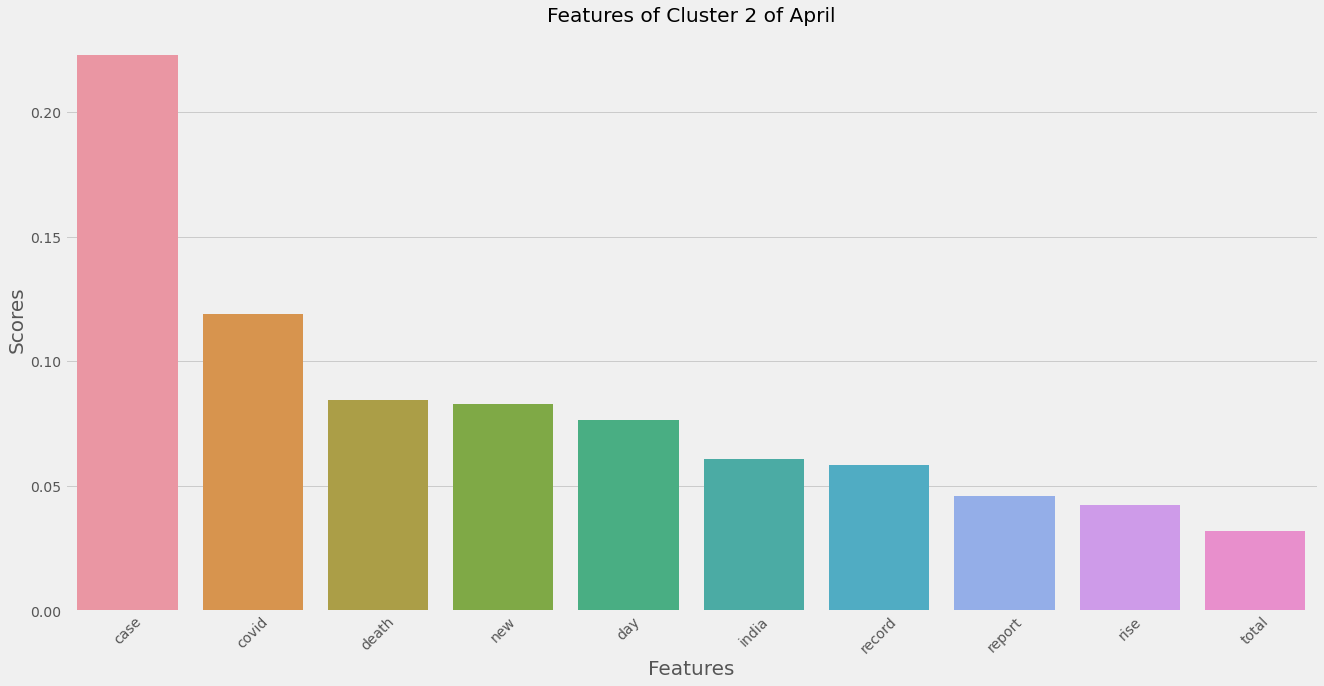

In [425]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=april_cluster[0]).set(title="Features of Cluster 2 of April")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

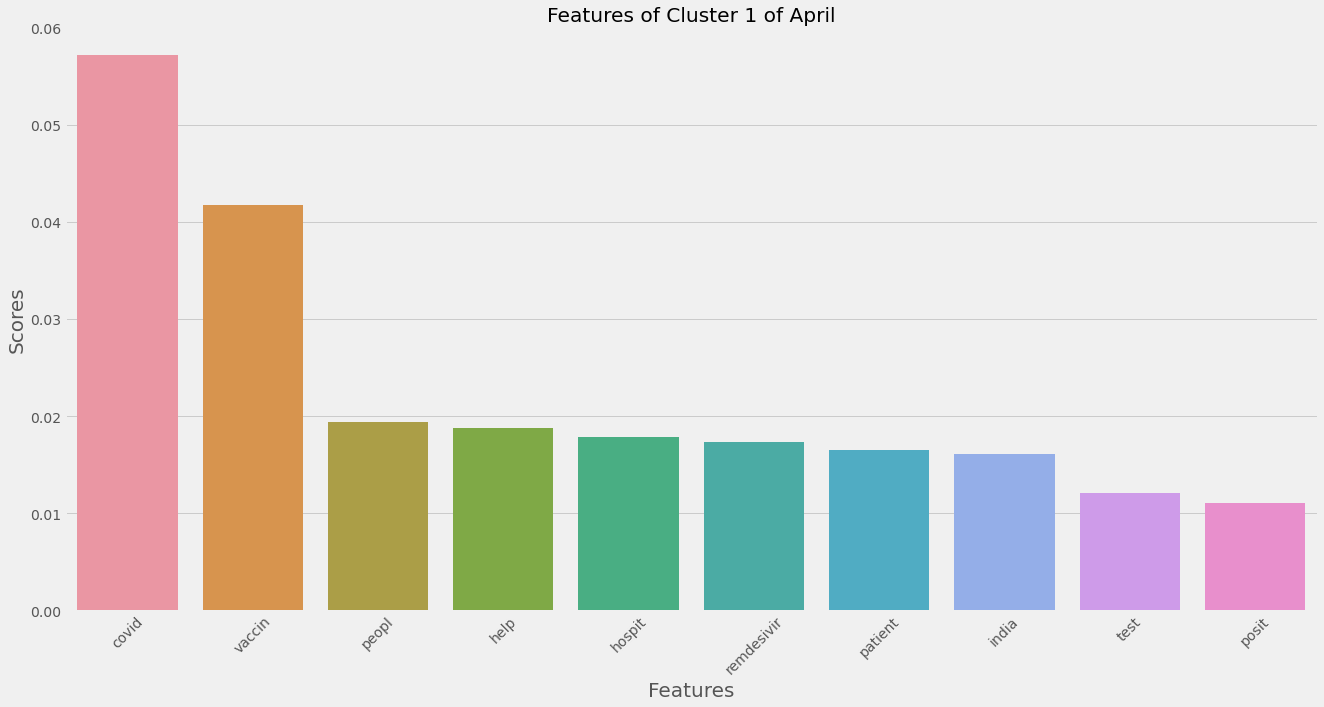

In [424]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=april_cluster[1]).set(title="Features of Cluster 1 of April")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

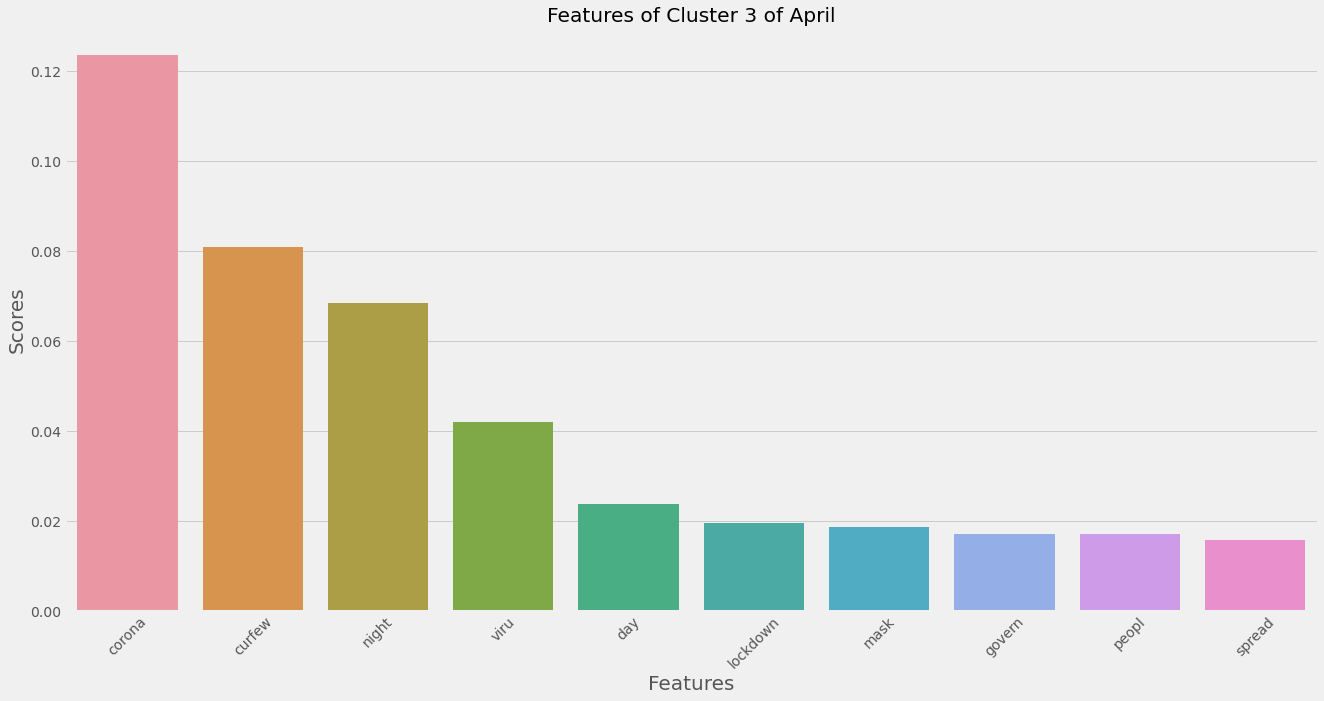

In [426]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=april_cluster[2]).set(title="Features of Cluster 3 of April")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

In [409]:
K3=dfs1[2]
K1=dfs1[0]
K2=dfs1[1]

In [410]:
april_bw=pd.read_csv('AprilTopWords.csv')

In [411]:
t=april_bw[:30]

In [412]:
c1=[]
p=0
c2=[]
q=0
c3=[]
x=0
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K1['features'][j]):
            c1.append(K1['features'][j])
            p=p+1
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K2['features'][j]):
            c2.append(K1['features'][j])
            q=q+1
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K3['features'][j]):
            c3.append(K3['features'][j])
            x=x+1

In [413]:

print(p)
print(q)
print(x)

20
27
20


### Tweet Grouping

In [414]:
label=kmeans.labels_
april['label']=label
april.head(3)

,tweet,clean_tweet,hastags,attherate,urls,emojis,label
0,COVID infection leads to clousure of two Jamsh...,covid infect lead clousur jamshedpur school db...,[],"['@HemantSorenJMM', '@DCEastSinghbhum', '@Bann...",[],[],1
1,"UK's Glastonbury Festival, cinemas, museums ge...",glastonburi festiv cinema museum govern cash s...,"['#Sipgrab', '#UnitingPeopleWithThePossibiliti...",[],['https://t.co/zsvvfaO49b'],[],1
2,These covid lockdowns make me desperate than e...,covid lockdown desper watch leak cum like true...,"['#sissyclit', '#ExposedSissySlut', '#sissy', ...",[],['https://t.co/RB7Dse2yYF'],[],1


In [415]:
np.unique(april['label'])

array([0, 1, 2])

In [416]:
april['label'].value_counts()

1    1894
2     510
0     161
Name: label, dtype: int64

In [417]:
april_cluster_1=april[april.label ==0]
april_cluster_2=april[april.label ==1]
april_cluster_3=april[april.label ==2]

In [418]:
april_cluster_1.to_csv('AprilCluster1Tweet.csv')
april_cluster_2.to_csv('AprilCluster2Tweet.csv')
april_cluster_3.to_csv('AprilCluster3Tweet.csv')

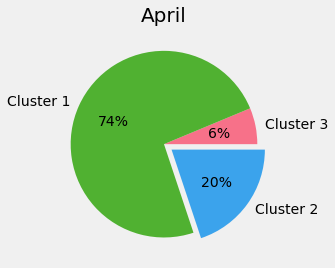

In [423]:
count=april['label'].value_counts()
tweet_freq_cluster=[]
tweet_freq_cluster.append(count[0])
tweet_freq_cluster.append(count[1])
tweet_freq_cluster.append(count[2])
cluster_name=['Cluster 3','Cluster 1','Cluster 2']
explode = [0, 0,0.1]
palette_color = sns.color_palette("husl", 3)
  
# plotting data on chart
plt.pie(tweet_freq_cluster, labels=cluster_name, colors=palette_color,   explode=explode,autopct='%.0f%%')
plt.title('April',fontsize=20)
# displaying chart
plt.show()



In [420]:
april['tweet'][1984]

'Nothing to worry my fellow country people ☺️, now a days corona is doing night shift thats why government imposed night curfew, lets support our #MaharashtraGovernment #NoMoreLockdowns #mumbailockdown #COVIDー19 #UddhavThackeray #nightcurfew #Trending  https://t.co/bsxIxPM2LC'